In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import chart
from scipy import signal
from scipy import constants

In [2]:
directory = '/Users/abeardsley/code/CHART/LWA-WSU-data/run1_inside/'
data, meta = chart.analysis.read_run(directory=directory)

In [3]:
# Remove extra low frequencies until we figure out how to do direct sampling
data = np.array(data)
cfreqs = np.array([m['frequency'] for m in meta])
ind = np.where(cfreqs > 26e6)[0]
data = data[ind]
meta = [meta[i] for i in ind]

<IPython.core.display.Javascript object>


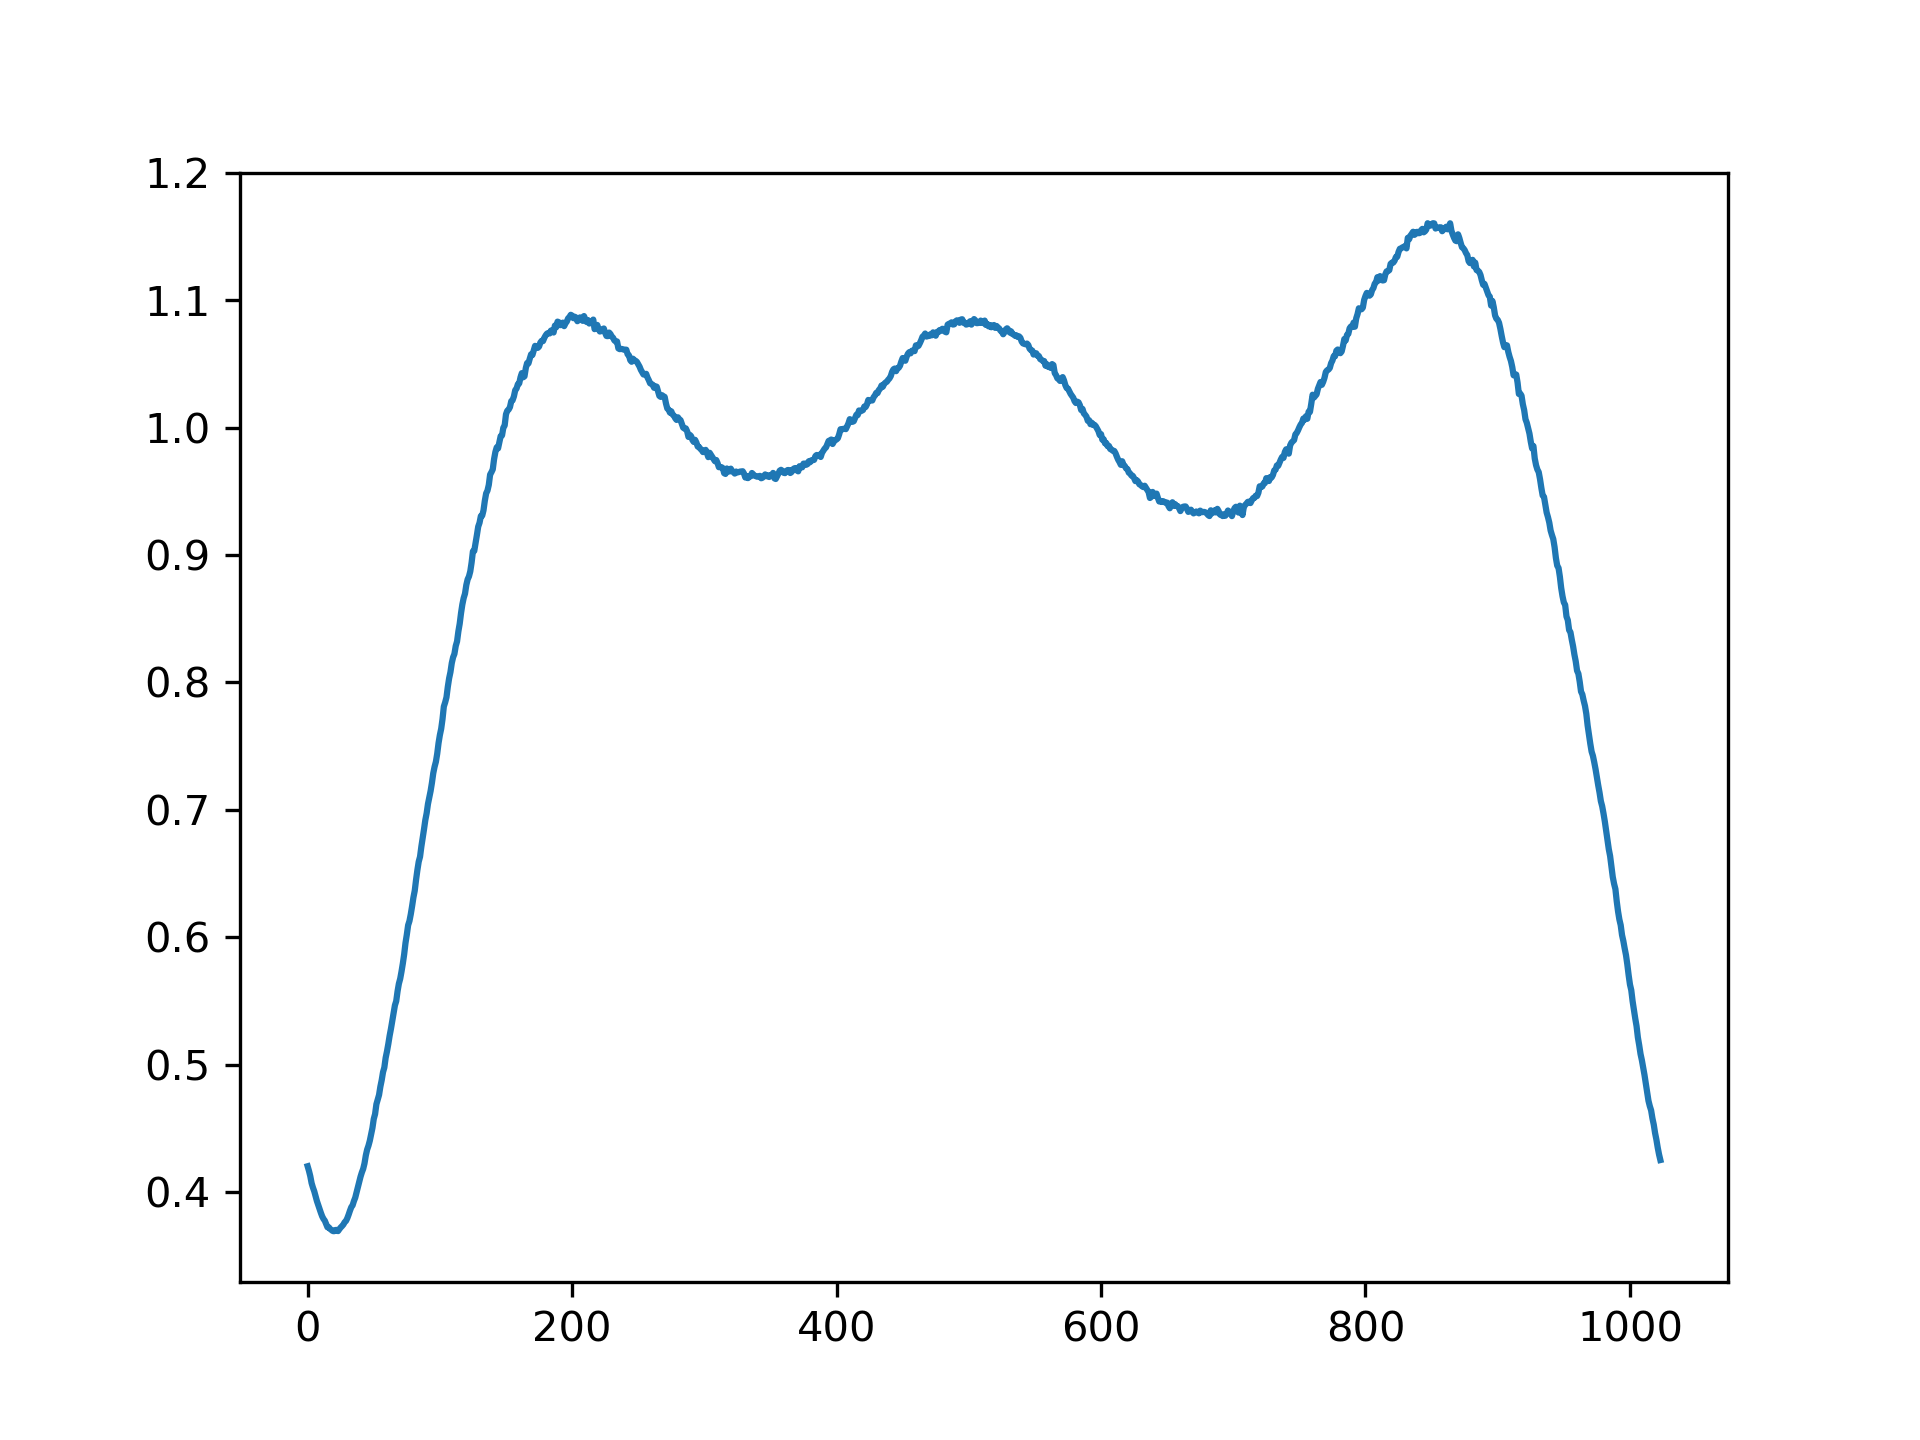

In [4]:
# Rough estimate for bandpass
levels = np.median(data[:, :, 256:-256], axis=(1, 2))
rescaled = data / levels.reshape(-1, 1, 1)
bp = np.median(rescaled, axis=(0, 1))

plt.figure()
plt.plot(bp)

<IPython.core.display.Javascript object>


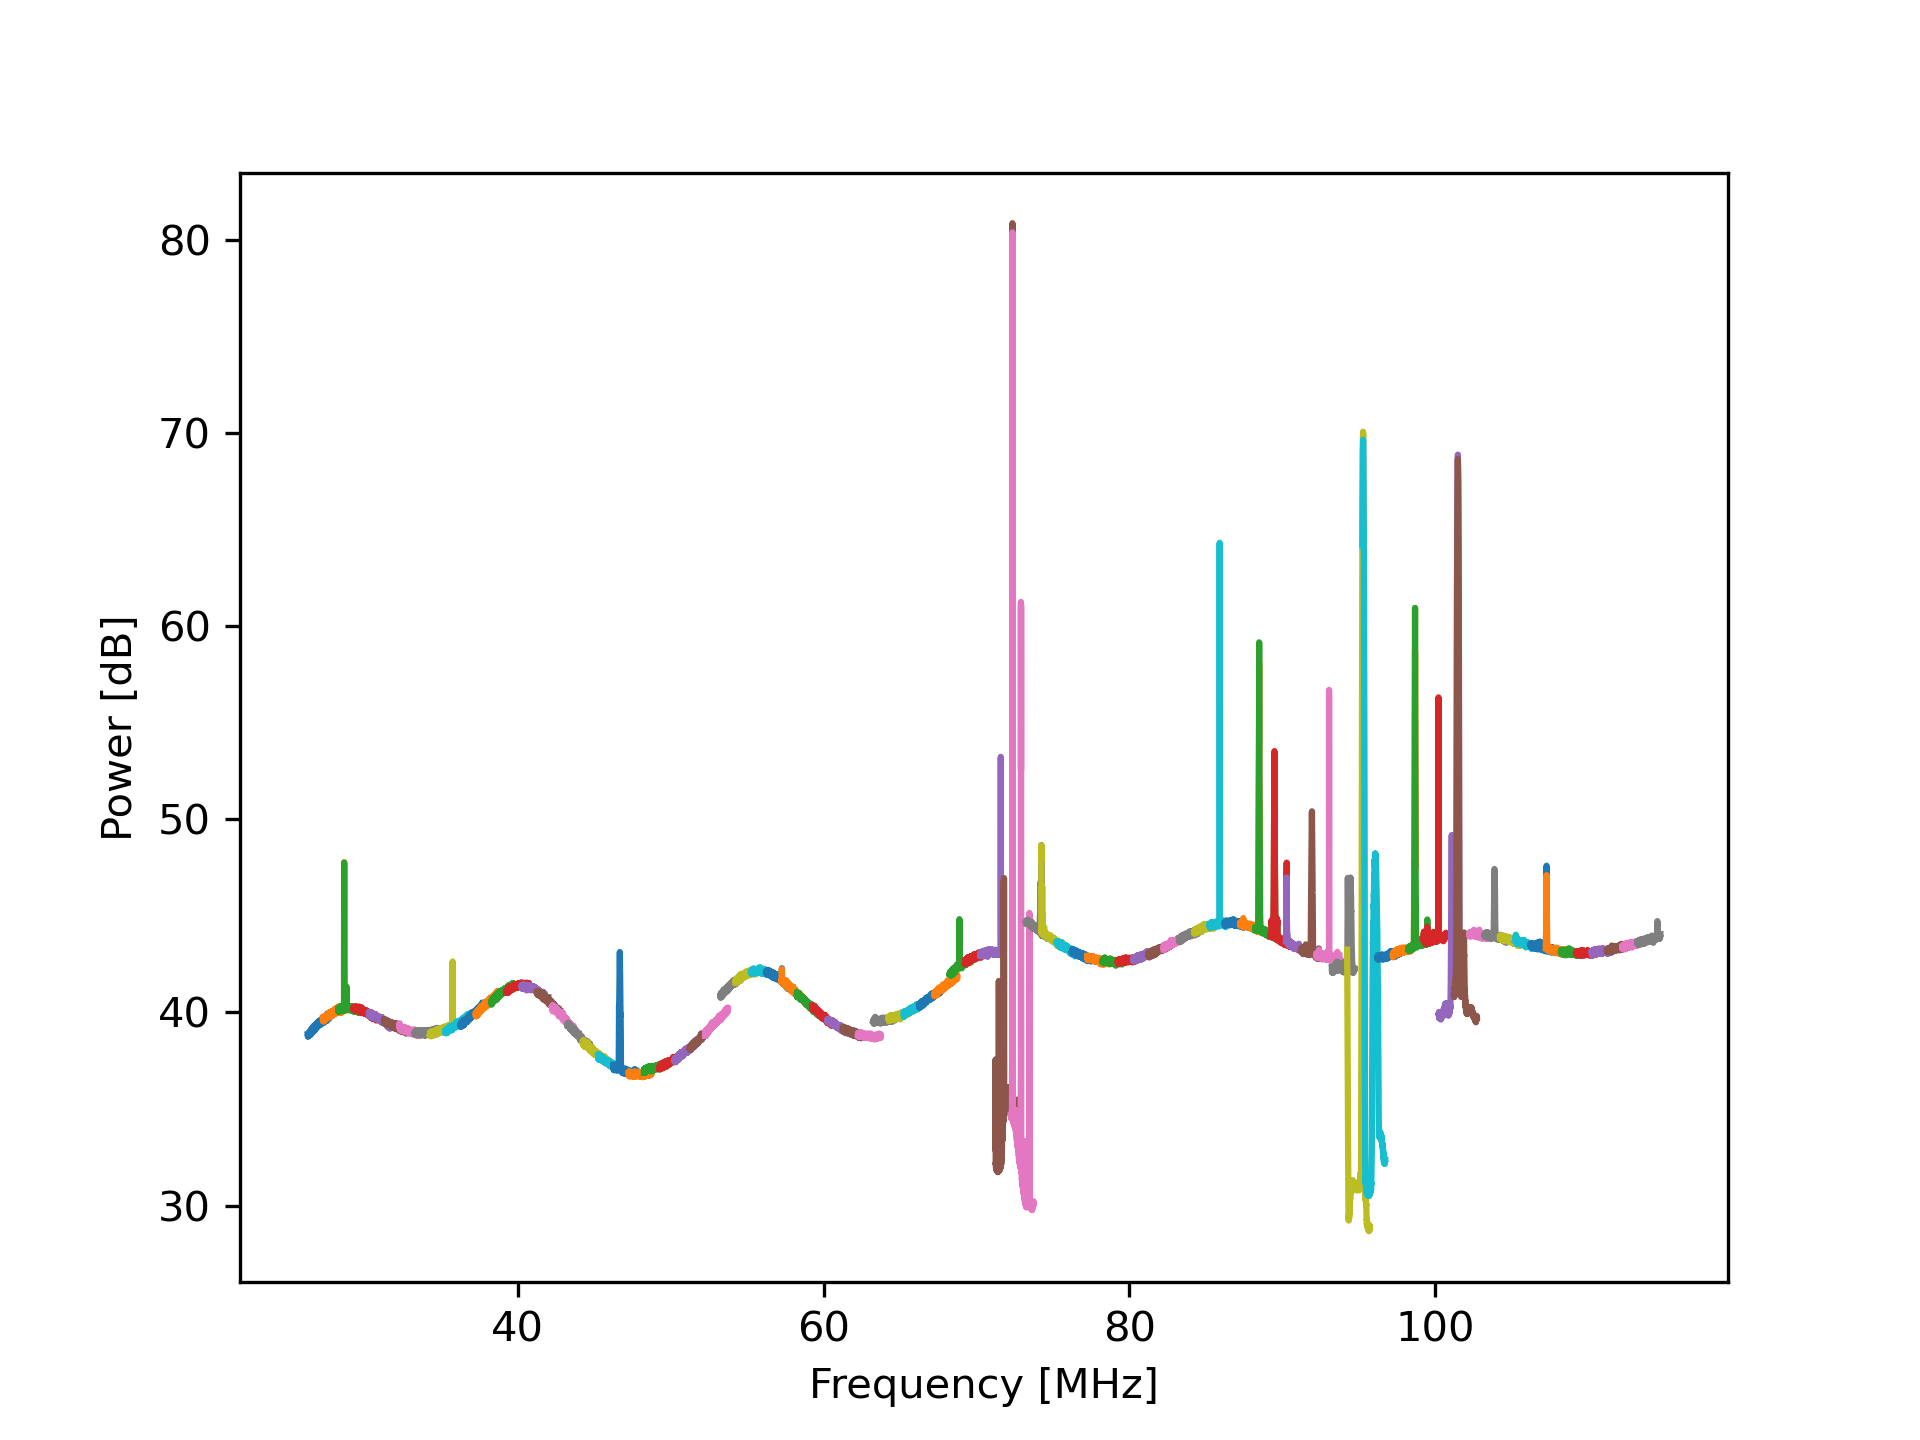

In [5]:
nremove = 128

plt.figure()
for d, m in zip(data, meta):
    spectrum = np.median(d, axis=0) / bp
    spectrum[m['vector_length'] // 2] = np.nan
    spectrum = spectrum[nremove:-nremove]
    frequencies = ((np.arange(m['vector_length']) - m['vector_length'] / 2)
                   * m['samp_rate'] / m['vector_length'] + m['frequency'])
    frequencies = 1e-6 * frequencies[nremove:-nremove]
    plt.plot(frequencies, 10 * np.log10(spectrum))
    plt.xlabel('Frequency [MHz]')
    plt.ylabel('Power [dB]')

In [6]:
osc_freq = (102 - 29) / 5 * 1e6
osc_time = 1 / osc_freq
reflect_length = 0.7 * constants.c * osc_time / 2.
print(reflect_length)

7.186805499999999
